In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Membaca dataset dari file CSV
dataset = pd.read_csv('cleaned_iotpond3.csv', parse_dates=["created_at"], index_col="created_at")
dataset.head(10)

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight,Unnamed: 9
created_at,,,,,,,,,
2021-06-19 00:00:04,23.75,80,4.58,7.05,0.820000,1.14,6.74,3.2,NaN
2021-06-19 00:00:26,23.75,80,4.20,7.09,0.810218,1.14,6.74,3.2,NaN
2021-06-19 00:02:03,23.75,80,3.67,7.08,0.830000,1.13,6.74,3.2,NaN
2021-06-19 00:02:26,23.75,81,1.20,7.07,0.912217,1.00,6.74,3.2,NaN
2021-06-19 00:03:31,23.75,80,2.34,7.09,0.915075,1.12,6.74,3.2,NaN
2021-06-19 00:04:15,23.69,80,3.31,7.08,0.840000,1.12,6.74,3.2,NaN
2021-06-19 00:05:52,23.75,80,4.18,7.08,0.810218,1.13,6.74,3.2,NaN
2021-06-19 00:06:11,23.75,80,1.70,7.10,0.916195,1.13,6.74,3.2,NaN
2021-06-19 00:06:31,23.75,80,3.81,7.04,0.830000,1.11,6.74,3.2,NaN


In [3]:
dataset = dataset.drop(['Unnamed: 9'], axis=1)

               temp  turbidity    oxygen        ph   ammonia    nitrat   
temp       1.000000  -0.412529  0.108848 -0.045709 -0.091421 -0.361103  \
turbidity -0.412529   1.000000 -0.206097 -0.089929  0.238022  0.493791   
oxygen     0.108848  -0.206097  1.000000  0.013810  0.047471 -0.141382   
ph        -0.045709  -0.089929  0.013810  1.000000  0.236622 -0.022537   
ammonia   -0.091421   0.238022  0.047471  0.236622  1.000000 -0.208087   
nitrat    -0.361103   0.493791 -0.141382 -0.022537 -0.208087  1.000000   
length    -0.301794   0.427924 -0.080961 -0.425671 -0.390357  0.739026   
weight    -0.122008   0.314009 -0.053010 -0.592051 -0.432761  0.531233   

             length    weight  
temp      -0.301794 -0.122008  
turbidity  0.427924  0.314009  
oxygen    -0.080961 -0.053010  
ph        -0.425671 -0.592051  
ammonia   -0.390357 -0.432761  
nitrat     0.739026  0.531233  
length     1.000000  0.913650  
weight     0.913650  1.000000  


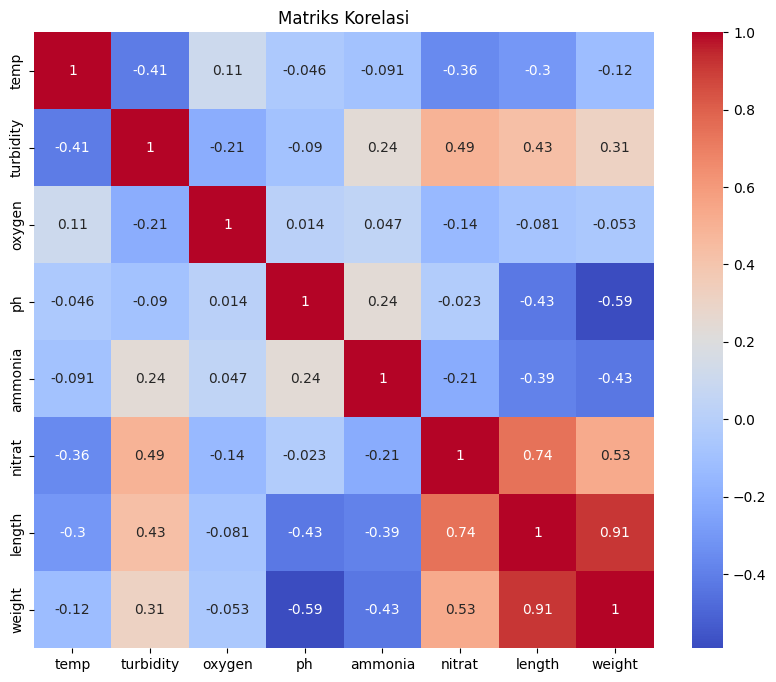

In [4]:
# Menghitung koefisien korelasi antara masing-masing fitur
corr_matrix = dataset.corr()

# Menampilkan matriks korelasi
print(corr_matrix)

# Menggunakan heatmap untuk memvisualisasikan matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

<Axes: xlabel='created_at'>

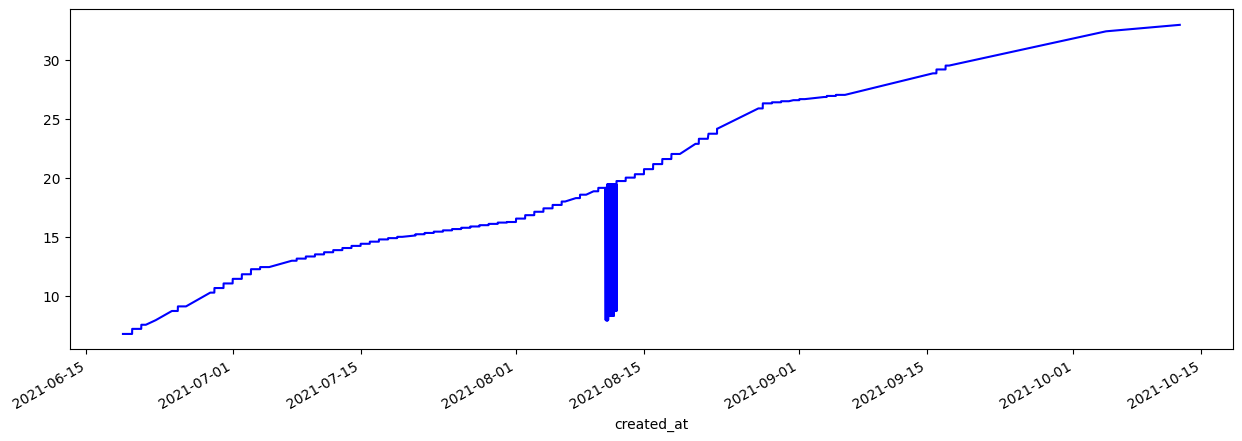

In [6]:
dataset.length.plot(figsize=(15,5), color="b")

<Axes: xlabel='created_at'>

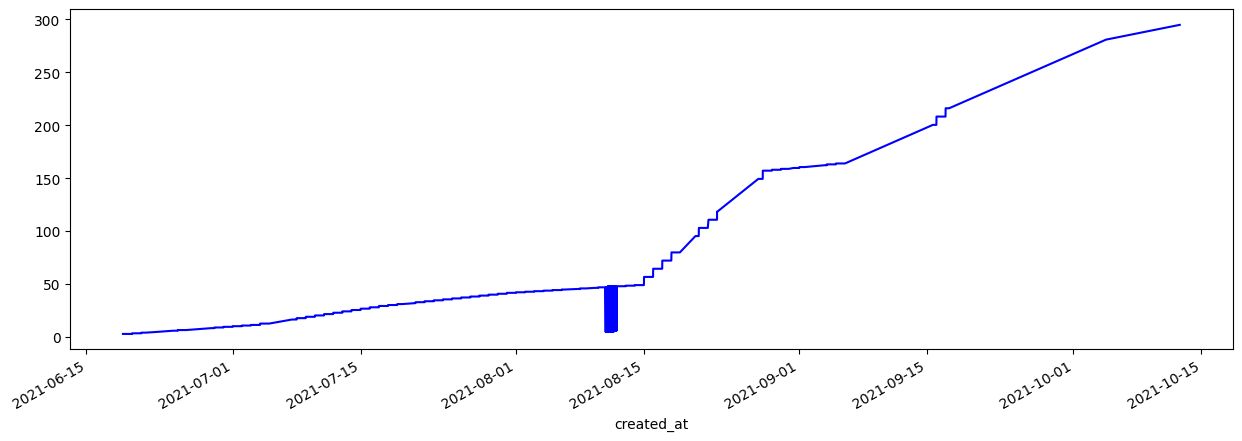

In [7]:
dataset.weight.plot(figsize=(15,5), color="b")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169185 entries, 2021-06-19 00:00:04 to 2021-10-12 15:05:46
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   temp       169185 non-null  float64
 1   turbidity  169185 non-null  int64  
 2   oxygen     169185 non-null  float64
 3   ph         169185 non-null  float64
 4   ammonia    169185 non-null  float64
 5   nitrat     169185 non-null  float64
 6   length     169185 non-null  float64
 7   weight     169185 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 11.6 MB


In [9]:
dataset.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight
count,169185.000000,169185.000000,169185.000000,169185.000000,169185.000000,169185.000000,169185.000000,169185.000000
mean,23.770007,85.073482,4.921388,7.186566,0.318481,3.806004,16.058793,44.259006
std,0.630763,25.596957,1.736797,0.628462,0.270943,2.549415,5.001695,45.519340
min,22.310000,8.000000,0.008000,1.007080,0.000000,0.010000,6.740000,3.200000
25%,23.375000,85.000000,4.657000,7.240000,0.080000,1.230000,13.320000,19.380000
50%,23.750000,99.000000,5.080000,7.310000,0.270000,4.170000,15.540000,35.830000
75%,24.125000,100.000000,5.380000,7.357790,0.413725,5.850000,18.860000,46.680000
max,26.560000,100.000000,10.000000,11.460000,1.034540,19.730000,33.000000,294.920000


In [10]:
# Menentukan apakah ada nilai kosong dalam dataset
ada_nilai_kosong = dataset.isnull().values.any()

if ada_nilai_kosong:
    print("Dataset memiliki nilai kosong.")
    
    # Mencari lokasi kosong berdasarkan kolom
    kolom_kosong = dataset.columns[dataset.isnull().any()].tolist()
    print("Kolom yang memiliki nilai kosong:", kolom_kosong)
    
    # Mencari lokasi kosong berdasarkan baris
    baris_kosong = dataset[dataset.isnull().any(axis=1)]
    print("Baris yang memiliki nilai kosong:\n", baris_kosong)
else:
    print("Dataset tidak memiliki nilai kosong.")

Dataset tidak memiliki nilai kosong.


In [11]:
# Merubah ke dalam data harian
day_dataset = dataset.resample('D', level=0).max()

In [12]:
day_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2021-06-19 to 2021-10-12
Freq: D
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       75 non-null     float64
 1   turbidity  75 non-null     float64
 2   oxygen     75 non-null     float64
 3   ph         75 non-null     float64
 4   ammonia    75 non-null     float64
 5   nitrat     75 non-null     float64
 6   length     75 non-null     float64
 7   weight     75 non-null     float64
dtypes: float64(8)
memory usage: 8.2 KB


In [13]:
day_dataset.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,24.312433,94.280000,9.289107,7.435183,0.477798,6.857700,17.873067,64.841333
std,0.641487,18.378572,1.484781,1.065637,0.351125,4.495933,6.261272,66.822574
min,23.062500,19.000000,5.080000,2.745700,0.000120,1.230000,6.740000,3.200000
25%,23.877500,100.000000,9.689000,7.396595,0.103945,2.225000,13.770000,22.580000
50%,24.250000,100.000000,9.944000,7.503060,0.413725,6.360000,16.200000,41.110000
75%,24.658750,100.000000,9.989500,7.661940,0.825938,10.040000,21.815000,76.285000
max,26.560000,100.000000,10.000000,11.460000,1.034540,19.730000,33.000000,294.920000


<Axes: xlabel='created_at'>

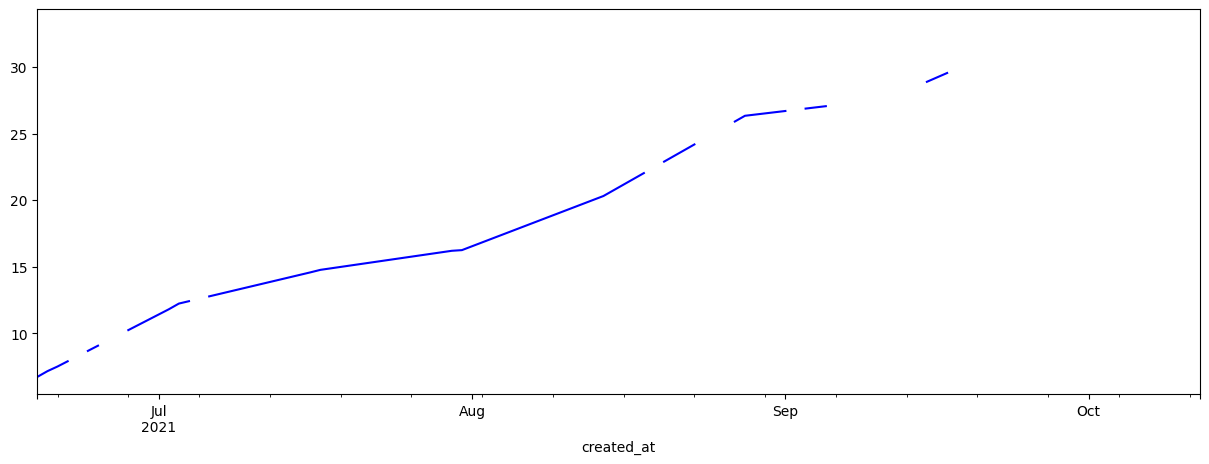

In [14]:
day_dataset.length.plot(figsize=(15,5), color="b")

<Axes: xlabel='created_at'>

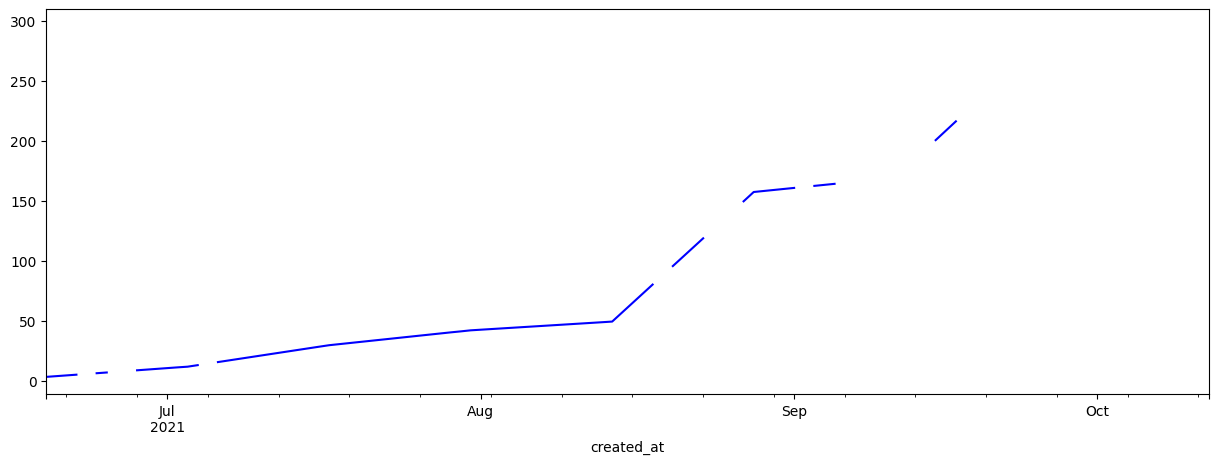

In [15]:
day_dataset.weight.plot(figsize=(15,5), color="b")

In [16]:
# Membuat features baru berupa delta_length dan delta_weight
# Menghitung perbedaan antara nilai length pada hari ini dengan hari kemarin
day_dataset['delta_length'] = day_dataset['length'] - day_dataset['length'].shift(1)

# Menghitung perbedaan antara nilai weight pada hari ini dengan hari kemarin
day_dataset['delta_weight'] = day_dataset['weight'] - day_dataset['weight'].shift(1)

# Menghapus baris pertama yang memiliki nilai NaN setelah menghitung perbedaan
day_dataset_1 = day_dataset.dropna()

# Menampilkan dataset yang telah ditambahkan fitur baru
print(day_dataset_1)

               temp  turbidity  oxygen       ph   ammonia  nitrat  length   
created_at                                                                  
2021-06-20  26.1300       37.0   9.988  7.78000  0.906006    1.23    7.17  \
2021-06-21  25.4400       27.0   9.988  7.67555  0.280000    1.23    7.52   
2021-06-22  23.8800       31.0   9.935  7.33963  0.632352    4.98    7.91   
2021-06-25  25.4375      100.0   9.989  7.56207  0.960588    1.49    9.08   
2021-06-29  24.1900      100.0   9.998  7.77996  0.969360    1.47   10.64   
...             ...        ...     ...      ...       ...     ...     ...   
2021-09-01  24.6300      100.0   9.239  7.43950  0.001080    9.35   26.69   
2021-09-04  23.4400      100.0   6.427  7.37595  0.001240   10.45   26.96   
2021-09-05  23.6900      100.0   9.793  7.42134  0.001230   13.01   27.05   
2021-09-16  25.0000      100.0   5.080  4.88832  0.000230   11.77   29.21   
2021-09-17  24.3100      100.0   5.080  4.98365  0.000420   11.29   29.54   

In [17]:
day_dataset_1.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight,delta_length,delta_weight
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,24.260538,94.830769,9.502431,7.590863,0.506123,7.080000,17.415846,56.085077,0.244615,1.892154
std,0.565732,17.572679,1.217999,0.818658,0.328515,4.486696,5.394063,52.580804,0.124425,2.526185
min,23.062500,19.000000,5.080000,4.888320,0.000230,1.230000,7.170000,3.810000,0.050000,0.520000
25%,23.880000,100.000000,9.819000,7.421340,0.280000,2.270000,14.040000,24.500000,0.110000,0.610000
50%,24.250000,100.000000,9.960000,7.521210,0.413725,7.070000,16.090000,40.280000,0.290000,0.890000
75%,24.500000,100.000000,9.998000,7.671020,0.825938,10.820000,20.310000,49.300000,0.350000,1.280000
max,26.130000,100.000000,10.000000,11.460000,1.034540,19.730000,29.540000,216.180000,0.430000,7.830000


<Axes: xlabel='created_at'>

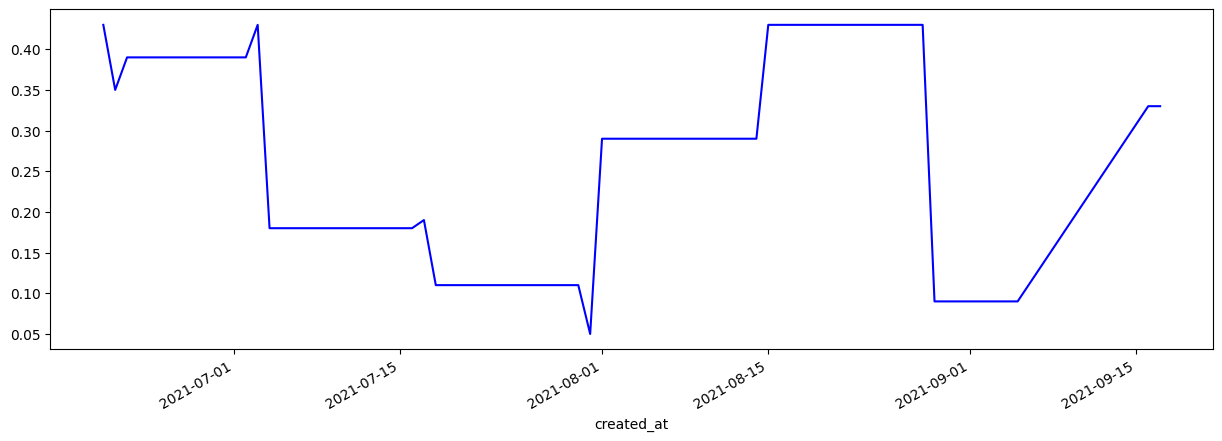

In [18]:
day_dataset_1.delta_length.plot(figsize=(15,5), color="b")

<Axes: xlabel='created_at'>

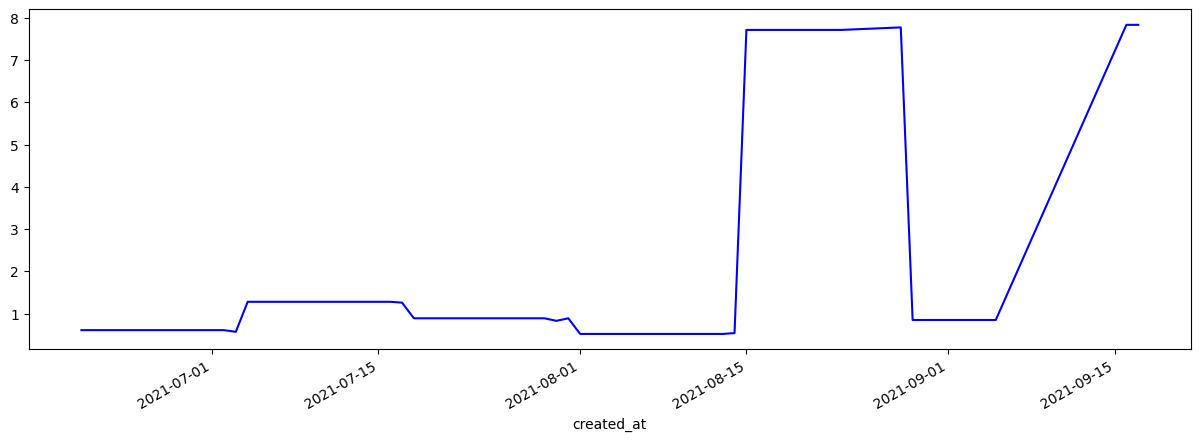

In [19]:
day_dataset_1.delta_weight.plot(figsize=(15,5), color="b")

In [20]:
# Mencoba membuat model regresi
# Menentukan fitur (X) dan target (y)
features = ['temp', 'turbidity', 'oxygen', 'ph', 'ammonia', 'nitrat']
target = ['delta_length','delta_weight']
X = day_dataset_1[features]
y = day_dataset_1[target]

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [21]:
# Mencoba prediksi
# Memasukkan parameter baru untuk prediksi
new_data = [[30.5, 97.0, 7.0, 6.5, 0.4, 7.0]]  # Ganti dengan parameter yang diinginkan
prediction = model.predict(new_data)

print("Prediksi panjang (length):", prediction)

Prediksi panjang (length): [[0.37892278 1.65509745]]


e:\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
